# Tutorial -> DF to distance matrix

In [37]:
#from https://stackoverflow.com/questions/35758612/most-efficient-way-to-construct-similarity-matrix
import pandas as pd
from scipy.spatial.distance import euclidean, pdist, squareform


def similarity_euclid(u, v):
    return 1/(1+euclidean(u,v))

DF_var = pd.DataFrame.from_dict({"s1":[1.2,3.4,10.2],"s2":[1.4,3.1,10.7],"s3":[2.1,3.7,11.3],"s4":[1.5,3.2,10.9]})
DF_var.index = ["g1","g2","g3"]

DF_var

,s1,s2,s3,s4
g1,1.2,1.4,2.1,1.5
g2,3.4,3.1,3.7,3.2
g3,10.2,10.7,11.3,10.9


In [104]:
dists = pdist(DF_var, similarity_euclid) #or cdist, prebuilt with metric or custom
dists

array([0.21596281, 0.05140761, 0.06302091])

In [99]:
#not used to preserve index and cols
#cdists = cdist(DF_var, DF_var, metric='cosine')
#cdists

array([[0.        , 0.01457137, 0.0160442 ],
       [0.01457137, 0.        , 0.00193392],
       [0.0160442 , 0.00193392, 0.        ]])

In [105]:
DF_euclid = pd.DataFrame(squareform(dists), columns=DF_var.index, index=DF_var.index)
DF_euclid

,g1,g2,g3
g1,0.000000,0.215963,0.051408
g2,0.215963,0.000000,0.063021
g3,0.051408,0.063021,0.000000


## Fake CSV

In [ ]:
data = pd.read_csv('../data/Patients.csv', sep = ';', index_col=0)
data

In [ ]:
data.Gene = data.Gene.astype('category')
data.dtypes

## Synthetic data

In [1]:
import tarfile
import pandas as pd

In [2]:
with tarfile.open("CM_026_formatted_synthetic_data_subset.tar", "r:*") as tar:
    csv_path = list(n for n in tar.getnames() if n.endswith('.csv'))[-1]
    df = pd.read_csv(tar.extractfile(csv_path), header=0, sep=",")
#WORKS but tar file contains many files --> stored in data folder

### Grabbing one gene expression file, subsetting and preparing

In [27]:
fulldf = pd.read_csv('GRCh37ERCC_ensembl75_genes_count.csv', header=0, sep=',', quotechar='"', error_bad_lines=False)
fulldf.head()

,Unnamed: 0,p227,p359,p533,p149,p160,p2,p261,p486,p367,...,p54,p108,p460,p279,p358,p90,p357,p435,p405,p150
0,ENSG00000203782,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,53.00,6.00,0.00,0.00,13.00,5.00,0.00,0.00
1,ENSG00000163431,2189.24,3642.99,981.26,1903.93,4444.56,412.45,1227.65,1469.23,2713.38,...,198.71,1182.42,1519.64,1403.98,1981.45,110.99,1609.91,3078.21,547.66,1254.12
2,ENSG00000239696,0.30,0.22,0.05,47.99,62.98,0.68,0.00,0.00,0.00,...,0.21,0.01,1501.08,19.24,34.80,9.35,0.02,4.87,62.09,0.24
3,ENSG00000237479,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,ENSG00000227649,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [32]:
df = fulldf.iloc[0:10,0:10]
df = df.T
df.columns = df.iloc[0]
df.drop(df.index[0], inplace = True)
df

Unnamed: 0,ENSG00000203782,ENSG00000163431,ENSG00000239696,ENSG00000237479,ENSG00000227649,ENSG00000182912,ENSG00000154864,ENSG00000080224,ENSG00000200486,ENSG00000226046
p227,0,2189.24,0.3,0,1,2,1248.26,0,0.02,0
p359,0,3642.99,0.22,0,0,3,1657.57,31,0,0
p533,0,981.26,0.05,0,0,4,1090.77,156,0.01,0
p149,0,1903.93,47.99,1,0,0,1749.69,7,0,0
p160,0,4444.56,62.98,0,0,4,2879.12,92,0,0
p2,0,412.45,0.68,0,0,23,2269.72,65,0.03,0
p261,0,1227.65,0,0,0,0,2483.47,157,0,0
p486,0,1469.23,0,0,1,16,2223.76,11,0,0
p367,0,2713.38,0,0,0,0,683.73,8,0.01,0


### applying distance and matrix

In [39]:
dists = pdist(df, similarity_euclid)
dists

array([0.00066155, 0.00081357, 0.00172434, 0.00035888, 0.00048742,
       0.00063523, 0.00082401, 0.00129638, 0.00036693, 0.00057362,
       0.00068274, 0.00030402, 0.00039112, 0.00044496, 0.00074211,
       0.00087294, 0.00025642, 0.00076145, 0.00070655, 0.0008044 ,
       0.00055977, 0.00035936, 0.00063192, 0.00098888, 0.00154751,
       0.00074609, 0.00024513, 0.00030832, 0.00032793, 0.00035729,
       0.00117775, 0.00094324, 0.00035762, 0.00259804, 0.00042744,
       0.00050483])

In [40]:
DF_euclid = pd.DataFrame(squareform(dists), columns=df.index, index=df.index)
DF_euclid

,p227,p359,p533,p149,p160,p2,p261,p486,p367
p227,0.000000,0.000662,0.000814,0.001724,0.000359,0.000487,0.000635,0.000824,0.001296
p359,0.000662,0.000000,0.000367,0.000574,0.000683,0.000304,0.000391,0.000445,0.000742
p533,0.000814,0.000367,0.000000,0.000873,0.000256,0.000761,0.000707,0.000804,0.000560
p149,0.001724,0.000574,0.000873,0.000000,0.000359,0.000632,0.000989,0.001548,0.000746
p160,0.000359,0.000683,0.000256,0.000359,0.000000,0.000245,0.000308,0.000328,0.000357
p2,0.000487,0.000304,0.000761,0.000632,0.000245,0.000000,0.001178,0.000943,0.000358
p261,0.000635,0.000391,0.000707,0.000989,0.000308,0.001178,0.000000,0.002598,0.000427
p486,0.000824,0.000445,0.000804,0.001548,0.000328,0.000943,0.002598,0.000000,0.000505
p367,0.001296,0.000742,0.000560,0.000746,0.000357,0.000358,0.000427,0.000505,0.000000


In [97]:
#try threshold!
bln1 = DF_euclid < 0.0005
bln1

,p227,p359,p533,p149,p160,p2,p261,p486,p367
p227,True,False,False,False,True,True,False,False,False
p359,False,True,True,False,False,True,True,True,False
p533,False,True,True,False,True,False,False,False,False
p149,False,False,False,True,True,False,False,False,False
p160,True,False,True,True,True,True,True,True,True
p2,True,True,False,False,True,True,False,False,True
p261,False,True,False,False,True,False,True,False,True
p486,False,True,False,False,True,False,False,True,False
p367,False,False,False,False,True,True,True,False,True


### convert distance to graph network

In [ ]:
import networkx as nx
G = nx.from_numpy_matrix(bln1.to_numpy())
nx.draw(G,edge_color = [ i[2]['weight'] for i in G.edges(data=True) ] )

## Scipy try from https://github.com/lwileczek/isomap/blob/master/isomap.py

In [ ]:
data = DF_euclid.to_numpy()
n, m = data.shape

In [ ]:
#distance measure
from scipy.spatial.distance import cdist
dist = cdist(data.T, data.T, metric='cosine') #https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html

In [ ]:
#create adjacency matrix
import numpy as np
adj =  np.zeros((m, m))
adj

In [ ]:
bln = dist < 0.2
bln

In [ ]:
adj[bln] = dist[bln]
adj

adj[bln] = dist[bln]
adj

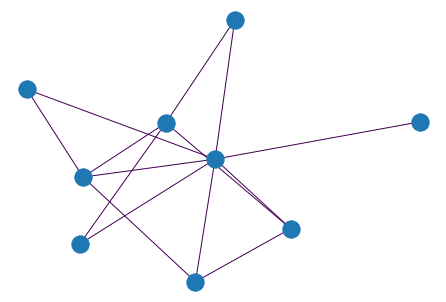

In [98]:
import networkx as nx
G = nx.from_numpy_matrix(bln1.to_numpy())
nx.draw(G,edge_color = [ i[2]['weight'] for i in G.edges(data=True) ] )

## Scipy try from https://github.com/lwileczek/isomap/blob/master/isomap.py

In [52]:
data = DF_euclid.to_numpy()
n, m = data.shape

In [56]:
#distance measure
from scipy.spatial.distance import cdist
dist = cdist(data.T, data.T, metric='cosine') #https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html

array([[1.11022302e-16, 2.10027720e-01, 2.11877462e-01, 4.38741085e-01,
        2.01267722e-01, 2.35217970e-01, 3.17749969e-01, 2.98562764e-01,
        3.83492893e-01],
       [2.10027720e-01, 0.00000000e+00, 1.51715524e-01, 2.13686782e-01,
        3.14850119e-01, 2.37134223e-01, 3.37972872e-01, 3.15957566e-01,
        2.53220252e-01],
       [2.11877462e-01, 1.51715524e-01, 0.00000000e+00, 1.86108343e-01,
        1.70675307e-01, 2.16423482e-01, 2.19571871e-01, 2.27515996e-01,
        1.81894046e-01],
       [4.38741085e-01, 2.13686782e-01, 1.86108343e-01, 0.00000000e+00,
        2.21742223e-01, 1.78509134e-01, 2.44302668e-01, 4.00944970e-01,
        1.72075875e-01],
       [2.01267722e-01, 3.14850119e-01, 1.70675307e-01, 2.21742223e-01,
        0.00000000e+00, 2.39463553e-01, 3.37906833e-01, 3.13613190e-01,
        1.64248812e-01],
       [2.35217970e-01, 2.37134223e-01, 2.16423482e-01, 1.78509134e-01,
        2.39463553e-01, 0.00000000e+00, 3.19929167e-01, 1.87734544e-01,
        2.5

In [87]:
#create adjacency matrix
import numpy as np
adj =  np.zeros((m, m))
adj

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [88]:
bln = dist < 0.2
bln

array([[ True, False, False, False, False, False, False, False, False],
       [False,  True,  True, False, False, False, False, False, False],
       [False,  True,  True,  True,  True, False, False, False,  True],
       [False, False,  True,  True, False,  True, False, False,  True],
       [False, False,  True, False,  True, False, False, False,  True],
       [False, False, False,  True, False,  True, False,  True, False],
       [False, False, False, False, False, False,  True, False, False],
       [False, False, False, False, False,  True, False,  True, False],
       [False, False,  True,  True,  True, False, False, False,  True]])

In [89]:
adj[bln] = dist[bln]
adj

array([[1.11022302e-16, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.51715524e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.51715524e-01, 0.00000000e+00, 1.86108343e-01,
        1.70675307e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.81894046e-01],
       [0.00000000e+00, 0.00000000e+00, 1.86108343e-01, 0.00000000e+00,
        0.00000000e+00, 1.78509134e-01, 0.00000000e+00, 0.00000000e+00,
        1.72075875e-01],
       [0.00000000e+00, 0.00000000e+00, 1.70675307e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.64248812e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.78509134e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.87734544e-01,
        0.0